[**Demo %s**](#demo-wave-boundaries)

In [2]:
c = 2;  m = 200;
[x, Dx] = diffcheb(m, [-1, 1]);

The boundary values of $u$ are given to be zero, so they are not unknowns in the ODEs. Instead they are added or removed as necessary.

In [3]:
chop = @(u) u(2:m);
extend = @(v) [0; v; 0];

The following function computes the time derivative of the system at interior points.

```{literalinclude} f124wave.m
```

Our initial condition is a single hump for $u$.

In [4]:
u_init = exp( -100*x.^2 );
z_init = -u_init;
w_init = [ chop(u_init); z_init ];  

Because the wave equation is hyperbolic, we can use a nonstiff explicit solver.

In [5]:
ivp = ode(ODEFcn=@f124wave);
ivp.InitialTime = 0;
ivp.InitialValue = w_init;
ivp.RelativeTolerance = 1e-4;
ivp.Parameters = {c, m, Dx, chop, extend};
t = linspace(0, 2, 101);
sol = solve(ivp, t);

We plot the results for the original $u$ variable only. Its interior values are at indices `1:m-1` of the composite $\mathbf{w}$ variable.

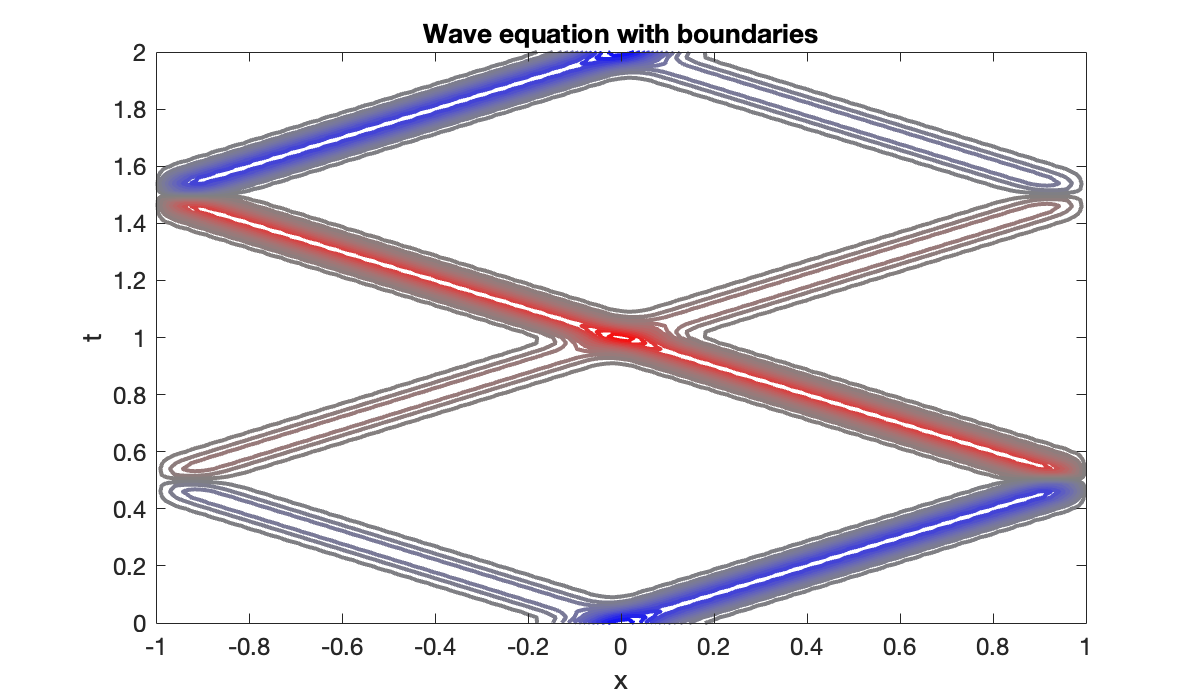

In [6]:
W = sol.Solution;
n = length(t)-1;
U = [ zeros(1, n+1); W(1:m-1, :); zeros(1, n+1) ];

cmap = zeros(256, 3);
cmap(129:end, 1) = 2/3;
cmap(1:128, 2) = linspace(1, 0, 128);
cmap(129:256, 2) = linspace(0, 1, 128);
cmap(1:128, 3) = linspace(1, 0.5, 128);
cmap(129:256, 3) = linspace(0.5, 1, 128);
cmap = hsv2rgb(cmap);

clf,  contour(x, t, U', 24, linewidth=2)
colormap(cmap),  clim([-1, 1])
xlabel x,  ylabel t
title("Wave equation with boundaries")

In [7]:
clf
plot(x, U(:, 1))
hold on
axis([-1, 1, -1.05, 1.05])
title("Wave equation with boundaries") 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("figures/wave-boundaries.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, U(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(-0.92, 0.85, str, fontsize=16);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)

The original hump breaks into two pieces of different amplitudes, each traveling with speed $c=2$. They pass through one another without interference. When a hump encounters a boundary, it is perfectly reflected, but with inverted shape. At time $t=2$, the solution looks just like the initial condition.